# PREDICTING STUDENT PERFORMANCE

In [2]:
# importing general data manipulation and plotting libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
# importing the data set from the download folder
data_path = '/Student_Performance.csv'
data = pd.read_csv(data_path)

## EDA 
#### Exploring the data and its structure

In [4]:
# checking the first few rows of the data to see what it looks like
data.head(10)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
5,3,78,No,9,6,61.0
6,7,73,Yes,5,6,63.0
7,8,45,Yes,4,6,42.0
8,5,77,No,8,2,61.0
9,4,89,No,4,0,69.0


In [5]:
data.shape, data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


((10000, 6), None)

In [6]:
data.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [7]:
data.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

<Axes: >

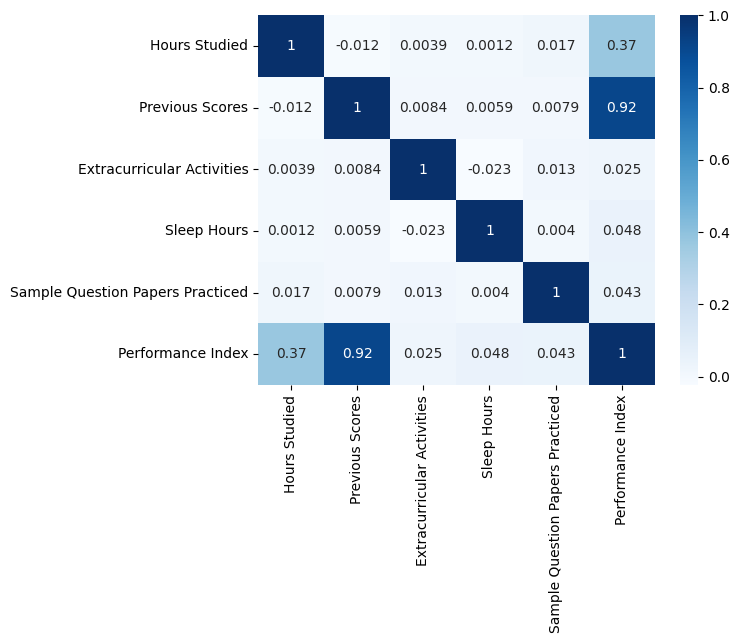

In [24]:
sns.heatmap(data.corr(), cmap='Blues', annot = True)

- Previous Scores and Hours Studied correlate stronger than the rest with the target variable
- this could potentially imply a strong enough model with just these two columns 

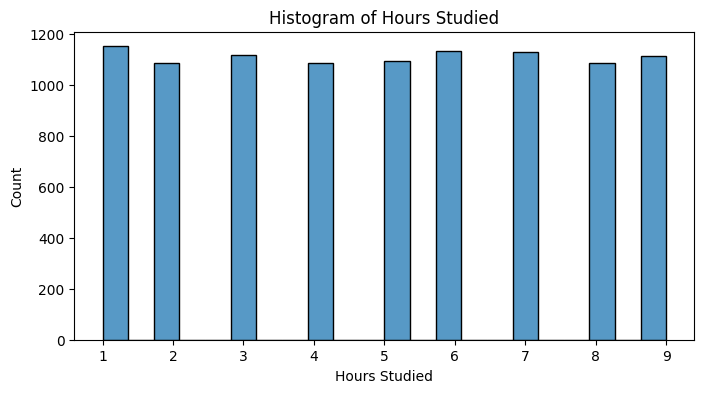

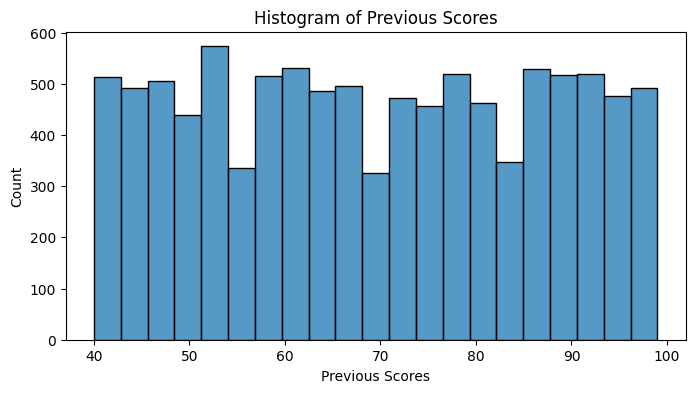

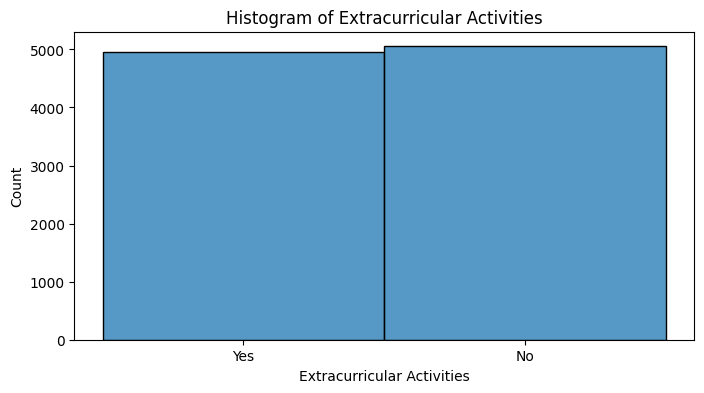

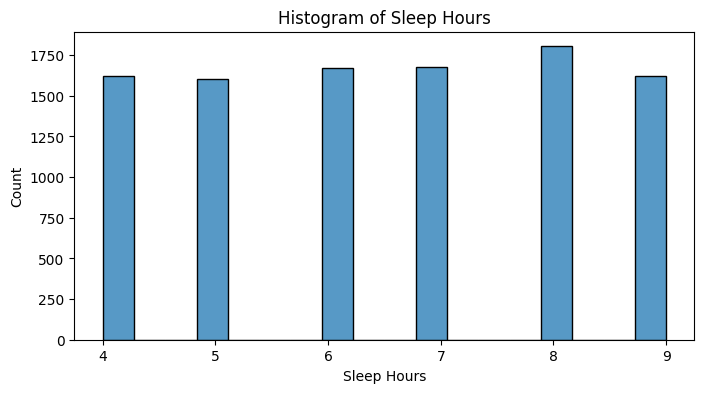

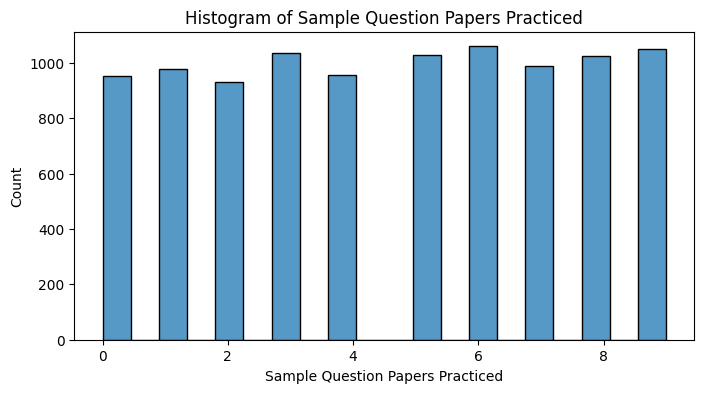

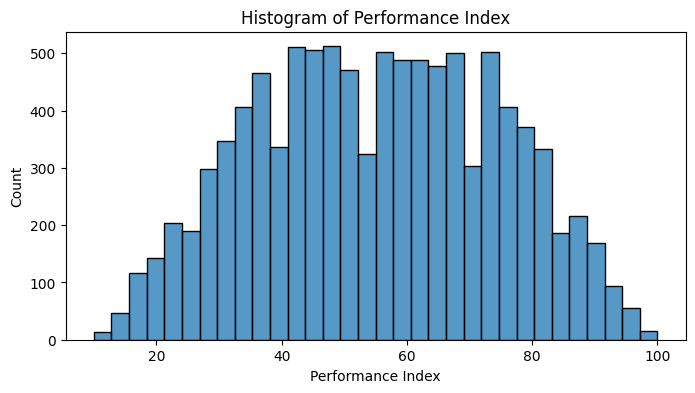

In [9]:
import matplotlib.pyplot as plt
for col in data.columns:
    plt.figure(figsize=(8, 4)) 
    sns.histplot(data=data, x=col, multiple='dodge') 
    plt.title(f"Histogram of {col}") 
    plt.show()

In [10]:
data['Extracurricular Activities'].value_counts()

Extracurricular Activities
No     5052
Yes    4948
Name: count, dtype: int64

In [11]:
# mapping the yes no values in extracurricular activities to binary outcomes. Can do with label encoder as well
data['Extracurricular Activities'] = data['Extracurricular Activities'].map({'Yes':1, 'No':0})

### Model Creation

In [12]:
# importing the SKlearn libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import StandardScaler

In [31]:
scaler = StandardScaler()
X = data.drop(['Performance Index'], axis = 1 )
y = data['Performance Index']
X_transformed = scaler.fit_transform(X)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed,y, test_size=0.3, random_state=13)

In [15]:
linear_model = LinearRegression()

In [16]:
linear_model.fit(X_train,y_train)
y_pred = linear_model.predict(X_test)

In [17]:
mse = mean_squared_error(y_test, y_pred)
r2score = r2_score(y_test, y_pred)

In [18]:
print(mse)
print(r2score)

4.105909509434773
0.988867441668614


 - MSE of 4.105 implies that the predicion cal vary by the same amount in either direction in the wrong predictions
 - R2 score of 98.8 percent implies that 98 percent of the variation observed in the target variable was possible to explain utilising the variation in the feature or independent variables

In [19]:
print(linear_model.score(X_train,y_train))
print(linear_model.score(X_test, y_test))

0.9886880722779362
0.988867441668614


In [20]:
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(linear_model, X,y, cv = 5)

In [21]:
print(cv_score)

[0.98879624 0.98827438 0.9891418  0.989087   0.98836991]


In [22]:
print(np.mean(cv_score))

0.9887338678935833


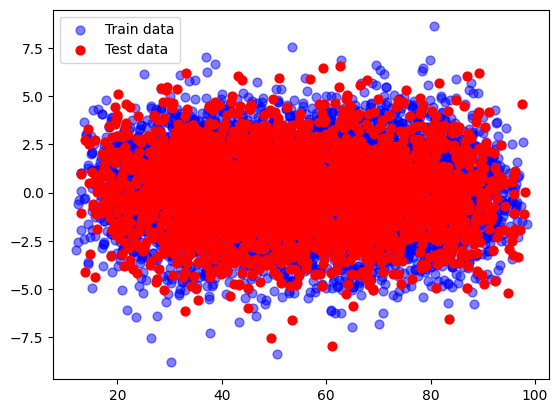

In [23]:
# plotting Residuals in Train and Test data 
plt.scatter(linear_model.predict(X_train), linear_model.predict(X_train) - y_train, c = 'b', s = 40, label = 'Train data', alpha = 0.5)
plt.scatter(linear_model.predict(X_test), linear_model.predict(X_test) - y_test, c = 'r', s = 40, label = 'Test data')
plt.legend()

- No discernible pattern in the plot above points towards the concurring the assumptions of creating a linear regression model.

In [36]:
# checking coefficienct importance
coefficients = linear_model.coef_
features = X.columns

# Create a DataFrame for better visualization
feature_importance = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})
print(feature_importance)

                            Feature  Coefficient
0                     Hours Studied     7.374817
1                   Previous Scores    17.650107
2        Extracurricular Activities     0.293911
3                       Sleep Hours     0.843077
4  Sample Question Papers Practiced     0.553168


- Here the feature importance shows that Previous Scores and Hours studied had the greatest impact on predicting the score of the student
- there is a correlation between correlation strength of the features and response variable and their importance in the model to be able to predict values